#   Russian Text Mining (Добыча текста на русском)

For my project, I chose to perform text analysis on Russian tweets that were pre-classified as having a positive or negative connotation to them. Specifically, I chose to look at the frequency of the most common words, and also the most common lemmas (roots). What I found was that positive tweets seem to talk more about today, use pleasant adjectives, and are normally talking about something funny. Negatives tweets seem to be about painful topics, like school and the future, and use a lot more swear words.

In terms of future motivation, my results could be combined with the notebook we did in class to determine whether or not a tweet is spam. This could be extremely useful, especially with the current election meddling happening on social media networks. However, a different dataset would probably need to be used, as these seem to be real tweets and do not cover political topics.
# Sources Used:
Russian Tweets Dataset: https://www.gutenberg.org/files/100/100-0.txt             
Russian Lemmas Dataset:  http://stimul.cognitivestudies.ru/ru_stimul/

In [1]:
!pip install googletrans

import numpy as np
import pandas as pd
from googletrans import Translator
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import RussianStemmer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

nltk.download('stopwords')


# Useful Variables
alphabet_RU = 'АаБбВвГгДдЕеЁёЖжЗзИиЙйКкЛлМмНнОоПпРрСсТтУуФфХхЦцЧчШшЩщЪъЫыЬьЭэЮюЯя'
stopwords_RU = stopwords.words('russian')
stemmer = RussianStemmer()
tknzr = TweetTokenizer()
translator = Translator()

positive = True # Choose which dataset
num_words = 25   # Choose how many words to display on the charts
figure_size = (12,10) # How big the charts should be

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#   Load Tweets Dataset
Source: http://study.mokoron.com/#download

In [2]:
if (positive):
    tweets_df = pd.read_csv('positive_UTF_clean.csv', encoding='UTF_8')
else:
    tweets_df = pd.read_csv('negative_UTF_clean.csv', encoding='UTF_8')

# Tokenize a Tweet
Break a tweet into an array of words. Remove any @mentions or symbols.

In [3]:
def tokenize_tweet(tweet, stem=False):
    tokenized = tknzr.tokenize(tweet)
    
    # Remove Punctuation
    remove_punctuation = []
    for token in tokenized:
        for char in token:
            if (not char in alphabet_RU):
                remove_punctuation.append(token)
                
    for token in remove_punctuation:
        if token in tokenized:
            tokenized.remove(token)
    
    # Remove Stopwords
    remove_stopwords = []
    for token in tokenized:
        if token.lower() in stopwords_RU:
            remove_stopwords.append(token)
    
    for token in remove_stopwords:
        if token in tokenized:
            tokenized.remove(token)
    
    # Convert to Stem and lowercase
    if(stem):
        for word_ix in range(len(tokenized)):
            tokenized[word_ix] = stemmer.stem(tokenized[word_ix]).lower()
    else:
        for word_ix in range(len(tokenized)):
            tokenized[word_ix] = tokenized[word_ix].lower()
            
    return tokenized

In [4]:
# Example of Tokenizing Tweet
print(tweets_df['Tweets'].values[35])
print(tokenize_tweet(tweets_df['Tweets'].values[35]))
print(tokenize_tweet(tweets_df['Tweets'].values[35], stem=True))

RT @StarScrim3: #RT Электрогенератор http://t.co/qjlwirfD3A изсостоек и не победим!))
['электрогенератор', 'изсостоек', 'победим']
['электрогенератор', 'изсостоек', 'побед']


# Generate Dictionary of Words and Frequencies
Generate a dictionary containing Russian words and their associated frequency count in the tweets dataset.

In [5]:
words_dict = {}

for tweet in tweets_df['Tweets'].values:
    token = tokenize_tweet(tweet, stem=False)
    for word in token:
        if word in words_dict:
            words_dict[word] += 1
        else:
            words_dict[word] = 1

In [6]:
# Sort the Dictionary by Frequency in DataFrame
words_freq = sorted( words_dict.items(),key=lambda kv: kv[ 1 ] )[ ::-1 ]
words_freq_df = pd.DataFrame(words_freq,columns=('Word','Frequency'))

# Generate English Translations for the Most Frequent Words
Add a column containing the English translations for the most frequent words.

Note: Google places a quota on how many translations you can request per day, so do not run this too many times! :)

In [7]:
translations = [''] * len(words_freq)
for i,word in enumerate(words_freq):
    if i > num_words:
        break
    translations[i] = translator.translate(words_freq[i][0], src='ru', dest='en').text.lower()
words_freq_df['EN Translation'] = translations

words_freq_df.head()

,Word,Frequency,EN Translation
0,это,10732,this is
1,сегодня,4468,today
2,тебе,3848,you
3,просто,3813,simply
4,спасибо,3656,thanks


# Plot Graph of Frequency of Words

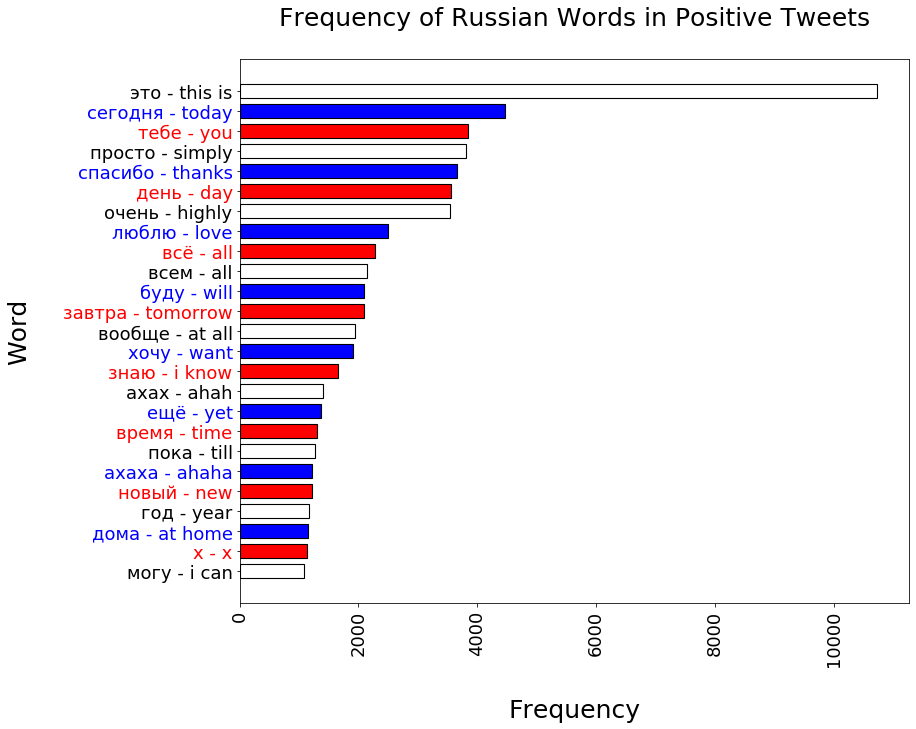

In [8]:
colors_bar = np.array(['w','b','r'])
colors_text = np.array(['black','b','r'])
plt.figure(figsize=figure_size)
bar = plt.barh(words_freq_df['Word'].values[:num_words][::-1]+' - '+words_freq_df['EN Translation'].values[:num_words][::-1],words_freq_df['Frequency'].values[:num_words][::-1],0.7)
color = 0
for i in reversed(range(num_words)):
    bar[i].set_color(colors_bar[color%colors_bar.size])
    bar[i].set_edgecolor('black')
    bar[i].set_linewidth(1.1)
    color += 1
color = 0
for i in reversed(plt.gca().get_yticklabels()):
    i.set_color(colors_text[color%colors_text.size])
    color += 1
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("\nFrequency", fontsize=25)
plt.ylabel("Word\n", fontsize=25)
title = "Frequency of Russian Words in "
if(positive):
    title += "Positive Tweets\n"
else:
    title += "Negative Tweets\n"
plt.title(title, fontsize=25)
plt.show()

# Export Data to Generate Lemmas Dataset
Export the 10,000 most frequent words to be used to generate the lemmas dataset.

Note: To get the _"clean"_ version of this CSV file, go to Data → From Text/CSV in Excel and select _"65001: Unicode (UTF-8)"_ as the _"File Origin"._ Make sure to save the file as _"CSV UTF-8 (Comma delimited) (*.csv)"._

In [ ]:
if (positive):
    words_freq_df[:10000].to_csv('positive_full_words_RAW.csv', columns=['Word'], header=False, index=False, encoding='UTF_8')
else:
    words_freq_df[:10000].to_csv('negative_full_words_RAW.csv', columns=['Word'], header=False, index=False, encoding='UTF_8')

# Generate and Load Lemmas Dataset
Upload the _"clean"_ dataset you created in the last cell to http://stimul.cognitivestudies.ru/ru_stimul/ under _"Upload word forms as a list in *.txt or *.csv file (utf-8 coding)"._ 


Select the columns: 
* Length (in characters)
* Length (in syllables)
* Stress position (in characters)
* Stress position (in syllables)
* Lemma
</ul>
and press <i>"Search".</i>
<br/><br/>Download the result at the top of the page.

In [ ]:
labels = ["Word", "Drop", "Length", "Syllables", "Lemma", "Stress Char Index", "Stress Syl Index"]

if (positive):
    tweets_lemma_df = pd.read_csv('positive_lemma.txt', names=labels, encoding='UTF_8')
else:
    tweets_lemma_df = pd.read_csv('negative_lemma.txt', names=labels, encoding='UTF_8')

In [ ]:
tweets_lemma_df = tweets_lemma_df.drop("Drop", axis=1)[1:]

# Copying 'Word' to 'Lemma' if Lemma Not Found
tweets_lemma_df["Lemma"] = tweets_lemma_df.apply(
    lambda row: row["Word"] if row["Lemma"] == "nf" else row["Lemma"],
    axis=1
)

# Remove Duplicates Added from Website
The website we used to generate the lemmas dataset sometimes adds rows based on if the words has multiple lemmas. We want to get rid of these extra rows as they will cause issues with our frequencies when we go to combine true duplicates entries (words with same lemma). 

In [ ]:
drop_indices = []
prev_row = ""
for index, row in tweets_lemma_df.iterrows():
    if (prev_row == row[0]):
        #print(index, prev_row, row[0])
        drop_indices.append(index)
    prev_row = row[0]
    
tweets_lemma_df.drop(index=tweets_lemma_df.index[drop_indices]-1, inplace=True)

# Compute Length and Add Frequencies
Compute the length for words the website was unable to calculate. 
<br/>Also, add the frequency column from our previous dataframe as the rows should now align.

In [ ]:
def length(word):
    count = 0
    for char in word:
        if char in alphabet_RU:
            count += 1
    return count

# Computing Length if Not Found
tweets_lemma_df["Length"] = tweets_lemma_df.apply(
    lambda row: length(row["Word"]) if row["Length"] == "nf" else row["Length"],
    axis=1
)

# Add Frequencies from Tweets Dataframe
tweets_lemma_df['Frequency'] = words_freq_df['Frequency'][:tweets_lemma_df.shape[0]].values

# Combine Duplicate Words
Combine rows that have the same word or the same lemma and sum the frequencies together. 

In [ ]:
# Combining Duplicates
tweets_lemma_df = tweets_lemma_df.groupby(['Word']).agg({'Frequency': 'sum', labels[2]: 'first', labels[3]: 'first', labels[4]: 'first', labels[5]: 'first', labels[6]: 'first'})
tweets_lemma_df = tweets_lemma_df.reset_index()
tweets_lemma_df = tweets_lemma_df.groupby(['Lemma']).agg({'Frequency': 'sum', labels[0]: 'first', labels[2]: 'first', labels[3]: 'first', labels[5]: 'first', labels[6]: 'first'})
tweets_lemma_df = tweets_lemma_df.sort_values(by=['Frequency'], ascending=False)
tweets_lemma_df = tweets_lemma_df.reset_index()

# Generate English Translations for the Most Frequent Words
Add a column containing the English translations for the most frequent words.
<br/>We must generate these again as (hopefully) our most frequent words have changed now that we have combined words with the same lemma.

Note: Google places a quota on how many translations you can request per day, so do not run this too many times! :)

In [ ]:
# Add Translations
translations = [''] * tweets_lemma_df.shape[0]
for i in range(tweets_lemma_df.shape[0]):
    if i > num_words:
        break
    translations[i] = translator.translate(tweets_lemma_df["Lemma"].values[i], src='ru', dest='en').text.lower()
tweets_lemma_df['EN Translation'] = translations

tweets_lemma_df = tweets_lemma_df.reindex(columns=[labels[0], labels[4], "Frequency", "EN Translation", labels[2], labels[3], labels[5], labels[6]])

tweets_lemma_df.head()

# Plot Graph of Frequency of Lemmas

In [ ]:
colors_bar = np.array(['w','b','r'])
colors_text = np.array(['black','b','r'])
plt.figure(figsize=figure_size)
bar = plt.barh(tweets_lemma_df['Lemma'].values[:num_words][::-1]+' - '+tweets_lemma_df['EN Translation'].values[:num_words][::-1],tweets_lemma_df['Frequency'].values[:num_words][::-1],0.7)
color = 0
for i in reversed(range(num_words)):
    bar[i].set_color(colors_bar[color%colors_bar.size])
    bar[i].set_edgecolor('black')
    bar[i].set_linewidth(1.1)
    color += 1
color = 0
for i in reversed(plt.gca().get_yticklabels()):
    i.set_color(colors_text[color%colors_text.size])
    color += 1
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("\nFrequency", fontsize=25)
plt.ylabel("Word\n", fontsize=25)
title = "Frequency of Russian Words in "
if(positive):
    title += "Positive Tweets (Lemmas)\n"
else:
    title += "Negative Tweets (Lemmas)\n"
plt.title(title, fontsize=25)
plt.show()

# Compute Various Values
* Average Word Length: How many letters are in the average word
* Average Word Syllables: How many syllables are in the average word
* Average Stress Character Index: Which letter does the stress fall on in the average word (one-indexed)
* Average Stress Syllabus Index: Which syllable does the stress fall on in the average word (one-indexed)

In [ ]:
len_sum = 0
len_total = 0
for index, row in tweets_lemma_df.iterrows():
    len_sum += int(row["Length"]) * int(row["Frequency"])
    len_total += int(row["Frequency"])
    
avg_len = len_sum / len_total
print("Average Word Length:",avg_len)

syl_sum = 0
syl_total = 0
for index, row in tweets_lemma_df.iterrows():
    if (row["Syllables"].isdigit()):
        syl_sum += int(row["Syllables"]) * int(row["Frequency"])
        syl_total += int(row["Frequency"])
    
avg_syl = syl_sum / syl_total
print("Average Word Syllables:",avg_syl)

char_stress_sum = 0
char_stress_total = 0
for index, row in tweets_lemma_df.iterrows():
    if (row["Stress Char Index"].isdigit() and int(row["Stress Char Index"]) > 0):
        char_stress_sum += int(row["Stress Char Index"]) * int(row["Frequency"])
        char_stress_total += int(row["Frequency"])
    
avg_char_stress = char_stress_sum / char_stress_total
print("Average Stress Character Index:",avg_char_stress)

syl_stress_sum = 0
syl_stress_total = 0
for index, row in tweets_lemma_df.iterrows():
    if (row["Stress Syl Index"].isdigit()  and int(row["Stress Syl Index"]) > 0):
        syl_stress_sum += int(row["Stress Syl Index"]) * int(row["Frequency"])
        syl_stress_total += int(row["Frequency"])
    
avg_syl_stress = syl_stress_sum / syl_stress_total
print("Average Stress Syllabus Index:",avg_syl_stress)